In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
files = ['merged_Floor1.csv', 'merged_Floor2.csv','merged_Floor3.csv','merged_Floor4.csv','merged_Floor5.csv','merged_Floor6.csv','merged_Floor7.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('All_Floors.csv')


In [9]:
df.dtypes

Unnamed: 0      float64
Date             object
z1_Light(kW)    float64
z1_Plug(kW)     float64
z2_AC1(kW)      float64
z2_AC2(kW)      float64
z2_AC3(kW)      float64
z2_AC4(kW)      float64
z2_Light(kW)    float64
z2_Plug(kW)     float64
z3_Light(kW)    float64
z3_Plug(kW)     float64
z4_Light(kW)    float64
z1_AC1(kW)      float64
z1_S1(degC)     float64
z1_S1(RH%)      float64
z1_S1(lux)      float64
z2_AC5(kW)      float64
z2_AC6(kW)      float64
z2_AC7(kW)      float64
z2_AC8(kW)      float64
z2_AC9(kW)      float64
z2_AC10(kW)     float64
z2_AC11(kW)     float64
z2_AC12(kW)     float64
z2_AC13(kW)     float64
z2_AC14(kW)     float64
z2_S1(degC)     float64
z2_S1(RH%)      float64
z2_S1(lux)      float64
z3_S1(degC)     float64
z3_S1(RH%)      float64
z3_S1(lux)      float64
z4_AC1(kW)      float64
z4_Plug(kW)     float64
z4_S1(degC)     float64
z4_S1(RH%)      float64
z4_S1(lux)      float64
z1_AC2(kW)      float64
z1_AC3(kW)      float64
z1_AC4(kW)      float64
z5_AC1(kW)      

In [10]:
df['date_only'] = df['Date'].str.split(pat=' ').str[0]
df

,Unnamed: 0,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),...,z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux),z4_AC2(kW),z4_AC3(kW),z4_AC4(kW),date_only
0,0.0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01
1,1.0,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01
2,2.0,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01
3,3.0,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01
4,4.0,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,NaN,2019-12-31 23:55:00,0.00,0.05,0.00,NaN,NaN,NaN,0.00,0.00,...,0.0,0.0,0.03,29.43,52.86,0.0,NaN,NaN,NaN,2019-12-31
790556,NaN,2019-12-31 23:56:00,0.00,0.05,0.00,NaN,NaN,NaN,0.00,0.00,...,0.0,0.0,0.03,29.43,52.87,0.0,NaN,NaN,NaN,2019-12-31
790557,NaN,2019-12-31 23:57:00,0.00,0.05,0.00,NaN,NaN,NaN,0.00,0.00,...,0.0,0.0,0.03,29.42,52.84,0.0,NaN,NaN,NaN,2019-12-31
790558,NaN,2019-12-31 23:58:00,0.00,0.04,0.00,NaN,NaN,NaN,0.00,0.01,...,0.0,0.0,0.03,29.41,52.87,0.0,NaN,NaN,NaN,2019-12-31


In [18]:
df=df.drop('Unnamed: 0',axis=1)

In [19]:
df.columns

Index(['Date', 'z1_Light(kW)', 'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)',
       'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)', 'z1_AC1(kW)',
       'z1_S1(degC)', 'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC5(kW)', 'z2_AC6(kW)',
       'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)',
       'z2_AC12(kW)', 'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_S1(degC)',
       'z2_S1(RH%)', 'z2_S1(lux)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)',
       'z4_AC1(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)',
       'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)', 'z4_AC2(kW)',
       'z4_AC3(kW)', 'z4_AC4(kW)', 'date_only'],
      dtype='object')

In [20]:
lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)','z5_Light(kW)']
acs = ['z1_AC1(kW)','z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)','z2_AC1(kW)','z2_AC2(kW)','z2_AC3(kW)','z2_AC4(kW)','z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)','z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)','z2_AC13(kW)', 'z2_AC14(kW)','z4_AC1(kW)','z4_AC2(kW)','z4_AC3(kW)', 'z4_AC4(kW)','z5_AC1(kW)']
plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)']


In [22]:
df[['z1_Light(kW)','z1_Plug(kW)']].sum()

z1_Light(kW)    12455925.18
z1_Plug(kW)      4622731.07
dtype: float64

In [25]:
date_list = df['date_only'].unique()


In [27]:
data= {'light_total':np.zeros(len(date_list)),'ac_total':np.zeros(len(date_list)),'plug_total':np.zeros(len(date_list)),'Date':np.zeros(len(date_list))}

In [29]:
final_df = pd.DataFrame(data)


In [30]:
final_df.iloc[0,3]

0.0

In [32]:
def create_data(date_list):
    i=0
    lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)','z5_Light(kW)']
    acs = ['z1_AC1(kW)','z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)','z2_AC1(kW)','z2_AC2(kW)','z2_AC3(kW)','z2_AC4(kW)','z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)','z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)','z2_AC13(kW)', 'z2_AC14(kW)','z4_AC1(kW)','z4_AC2(kW)','z4_AC3(kW)', 'z4_AC4(kW)','z5_AC1(kW)']
    plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)']

    for date in tqdm(date_list):
        final_df.iloc[i,0] = df[df['date_only'] == date][lights].sum().sum()
        final_df.iloc[i,1] = df[df['date_only'] == date][acs].sum().sum()
        final_df.iloc[i,2] = df[df['date_only'] == date][plug].sum().sum()
        final_df.iloc[i,3] = date
        i += 1


create_data(date_list) 

100%|████████████████████████████████████████████████████████████████████████████████| 550/550 [08:34<00:00,  1.07it/s]


In [41]:
final_df


,light_total,ac_total,plug_total,Date
0,95364.97,87832.78,46088.27,2018-07-01
1,161360.63,321692.58,61643.42,2018-07-02
2,170308.54,257869.71,56010.85,2018-07-03
3,163224.94,248564.43,59677.12,2018-07-04
4,152569.19,273196.04,52058.76,2018-07-05
...,...,...,...,...
544,134084.39,209814.85,36553.20,2019-12-27
545,65090.19,83760.73,32152.02,2019-12-28
546,64581.94,64775.03,29929.21,2019-12-29
547,57444.70,46747.21,29974.51,2019-12-30


In [42]:
final_df['Date'] = pd.to_datetime(final_df['Date']) # convert column to datetime object
final_df.set_index('Date', inplace=True)


In [43]:
final_df

,light_total,ac_total,plug_total
Date,,,
2018-07-01,95364.97,87832.78,46088.27
2018-07-02,161360.63,321692.58,61643.42
2018-07-03,170308.54,257869.71,56010.85
2018-07-04,163224.94,248564.43,59677.12
2018-07-05,152569.19,273196.04,52058.76
...,...,...,...
2019-12-27,134084.39,209814.85,36553.20
2019-12-28,65090.19,83760.73,32152.02
2019-12-29,64581.94,64775.03,29929.21


In [44]:
final_df.isnull().sum()

light_total    0
ac_total       0
plug_total     0
dtype: int64

<AxesSubplot:xlabel='Date'>

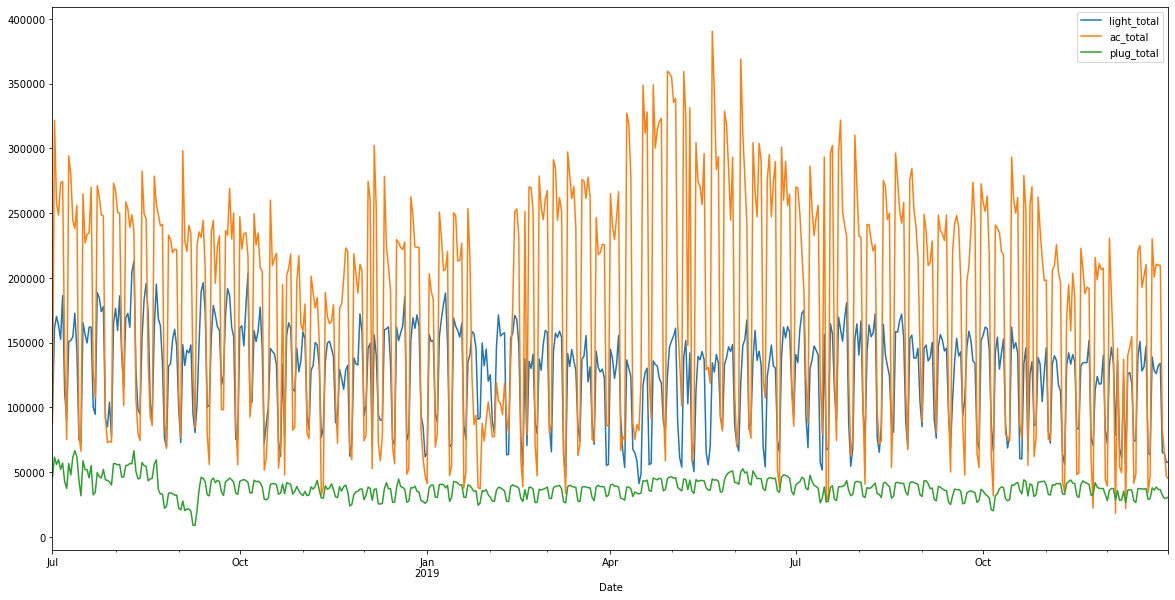

In [45]:
final_df.plot(figsize=(20,10))

In [46]:
res1=adfuller(final_df['light_total'])

In [47]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [54]:
adfuller_test(final_df['plug_total'])

ADF Test Statistic : -3.9815858202269334
p-value : 0.0015100627232961775
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


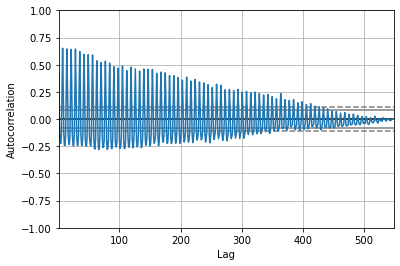

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final_df['light_total'])
plt.show()

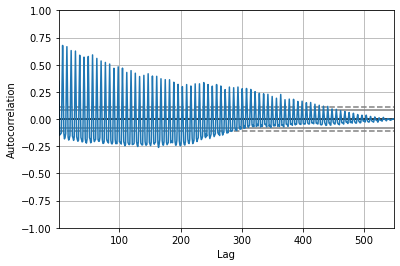

In [51]:
autocorrelation_plot(final_df['ac_total'])
plt.show()

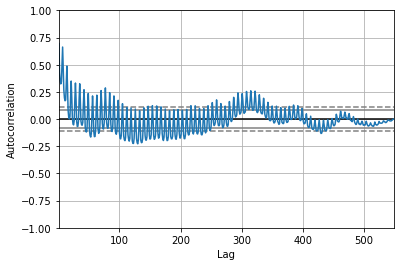

In [52]:
autocorrelation_plot(final_df['plug_total'])
plt.show()

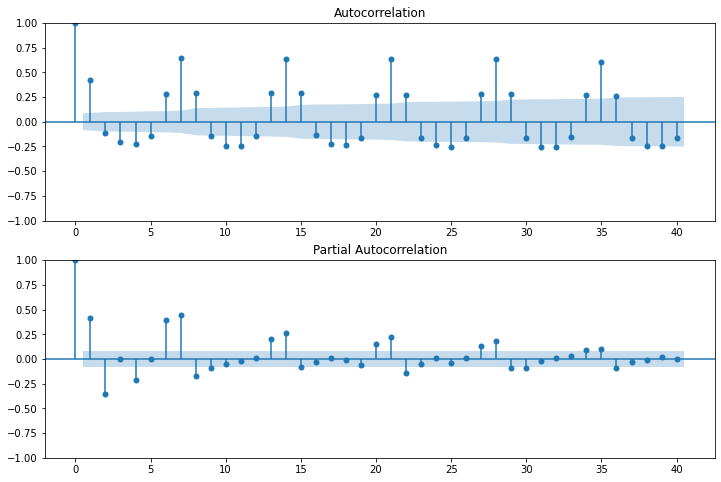

In [56]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_df['light_total'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_df['light_total'].iloc[13:],lags=40,ax=ax2)


In [57]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [58]:
model1=auto_arima(final_df['light_total'],trace=True,suppress_warnings=True)
model1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12919.640, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13166.630, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13167.947, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13082.038, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13164.633, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12950.488, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12936.520, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12934.961, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12909.468, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12892.478, Time=0.41 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=12725.925, Time=0.76 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12730.760, Time=0.79 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=12707.727, Time=1.08 sec
 ARIMA(5,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -6339.848
Date:                Thu, 20 Apr 2023   AIC                          12695.696
Time:                        18:58:25   BIC                          12730.147
Sample:                    07-01-2018   HQIC                         12709.161
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6037      0.046     13.266      0.000       0.514       0.693
ar.L2         -0.9287      0.051    -18.166      0.000      -1.029      -0.829
ar.L3          0.0337      0.065      0.521      0.602      -0.093       0.161
ar.L4         -0.4345      0.045     -9.657      0.000      -0.523      -0.346
ar.L5         -0.2374      0.042     -5.651      0.000      -0.320      -0.155
ma.L1         -1.2266      0.019    -64.780      0.000      -1.264      -1.190
ma.L2          0.9485      0.017     55.574      0.000       0.915       0.982
sigma2      6.477e+08   1.09e-11   5.94e+19      0.000    6.48e+08    6.48e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                17.47
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+36. Standard errors may be unstable.
"""

In [59]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 3) (30, 3)


<AxesSubplot:title={'center':'Building_level Light Consumption'}, xlabel='Date'>

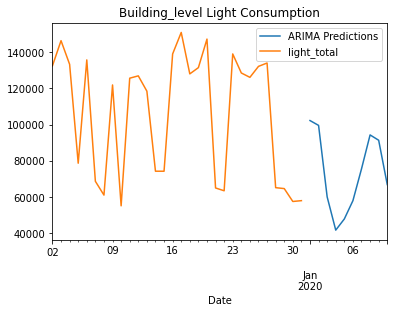

In [69]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,title='Building_level Light Consumption')
test['light_total'].plot(legend=True)

In [61]:
model2=auto_arima(final_df['ac_total'],trace=True,suppress_warnings=True)
model2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13875.134, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14182.978, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14178.290, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14042.795, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14180.979, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13929.642, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13925.164, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13909.474, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13882.348, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14000.021, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13919.222, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13925.680, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13870.867, Time=0.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=13683.497, Time=1.24 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -6810.949
Date:                Thu, 20 Apr 2023   AIC                          13637.897
Time:                        18:59:47   BIC                          13672.347
Sample:                    07-01-2018   HQIC                         13651.362
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4292      0.042     10.231      0.000       0.347       0.511
ar.L2         -0.8611      0.039    -22.315      0.000      -0.937      -0.785
ar.L3         -0.0876      0.051     -1.708      0.088      -0.188       0.013
ar.L4         -0.4140      0.038    -10.891      0.000      -0.489      -0.340
ar.L5         -0.3709      0.040     -9.228      0.000      -0.450      -0.292
ma.L1         -1.1960      0.023    -51.423      0.000      -1.242      -1.150
ma.L2          0.8882      0.024     37.483      0.000       0.842       0.935
sigma2      3.716e+09   3.41e-12   1.09e+21      0.000    3.72e+09    3.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                61.68
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.29
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.69e+36. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Building_level AC Consumption'}, xlabel='Date'>

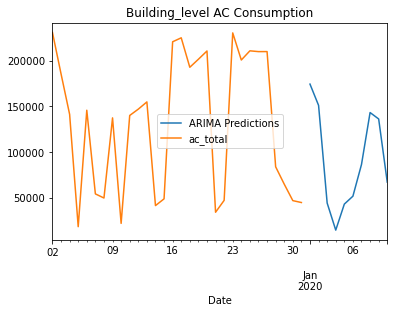

In [68]:
start=len(train)
end=len(train)+len(test)-1
pred=model2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Building_level AC Consumption')
test['ac_total'].plot(legend=True)

In [63]:
model3=auto_arima(final_df['plug_total'],trace=True,suppress_warnings=True)
model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10961.374, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11100.026, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11101.535, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11100.747, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11098.039, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10983.317, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10976.754, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10976.296, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11015.759, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10979.598, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10978.048, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10945.185, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5467.593
Date:                Thu, 20 Apr 2023   AIC                          10945.185
Time:                        19:00:35   BIC                          10966.717
Sample:                    07-01-2018   HQIC                         10953.601
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1088      0.045     24.485      0.000       1.020       1.198
ar.L2         -0.6857      0.030    -23.164      0.000      -0.744      -0.628
ma.L1         -1.4132      0.052    -27.270      0.000      -1.515      -1.312
ma.L2          0.6463      0.047     13.651      0.000       0.553       0.739
sigma2      2.705e+07   6.56e-10   4.13e+16      0.000     2.7e+07     2.7e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                45.75
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.21e+32. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Building_level Plug Load Consumption'}, xlabel='Date'>

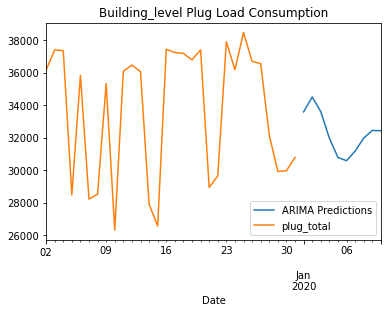

In [65]:
start=len(train)
end=len(train)+len(test)-1
pred=model3.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Building_level Plug Load Consumption')
test['plug_total'].plot(legend=True)

In [70]:
final_df['Power_Consumption']=final_df['light_total']+final_df['ac_total']+final_df['plug_total']

In [71]:
final_df

,light_total,ac_total,plug_total,Power_Consumption
Date,,,,
2018-07-01,95364.97,87832.78,46088.27,229286.02
2018-07-02,161360.63,321692.58,61643.42,544696.63
2018-07-03,170308.54,257869.71,56010.85,484189.10
2018-07-04,163224.94,248564.43,59677.12,471466.49
2018-07-05,152569.19,273196.04,52058.76,477823.99
...,...,...,...,...
2019-12-27,134084.39,209814.85,36553.20,380452.44
2019-12-28,65090.19,83760.73,32152.02,181002.94
2019-12-29,64581.94,64775.03,29929.21,159286.18


In [75]:
res2=adfuller(final_df['Power_Consumption'])


In [80]:
adfuller_test(final_df['Power_Consumption'])

ADF Test Statistic : -2.968367911502231
p-value : 0.03795590271201639
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [77]:
model4=auto_arima(final_df['Power_Consumption'],trace=True,suppress_warnings=True)
model4.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14263.453, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14564.627, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14562.987, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14433.157, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14562.628, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14317.052, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14308.892, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14298.510, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14268.793, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14398.596, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14311.981, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14308.554, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14253.713, Time=0.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=14053.234, Time=0.66 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -6993.398
Date:                Thu, 20 Apr 2023   AIC                          14002.796
Time:                        19:12:46   BIC                          14037.246
Sample:                    07-01-2018   HQIC                         14016.261
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4200      0.041     10.341      0.000       0.340       0.500
ar.L2         -0.8556      0.039    -22.110      0.000      -0.931      -0.780
ar.L3         -0.0967      0.052     -1.853      0.064      -0.199       0.006
ar.L4         -0.4105      0.038    -10.742      0.000      -0.485      -0.336
ar.L5         -0.3772      0.038     -9.896      0.000      -0.452      -0.303
ma.L1         -1.2065      0.019    -62.146      0.000      -1.245      -1.168
ma.L2          0.9231      0.020     46.495      0.000       0.884       0.962
sigma2      7.094e+09   2.09e-12    3.4e+21      0.000    7.09e+09    7.09e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                68.11
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.33
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+37. Standard errors may be unstable.
"""

In [85]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 4) (30, 4)


<AxesSubplot:title={'center':'Building Level Total Power Consumption'}, xlabel='Date'>

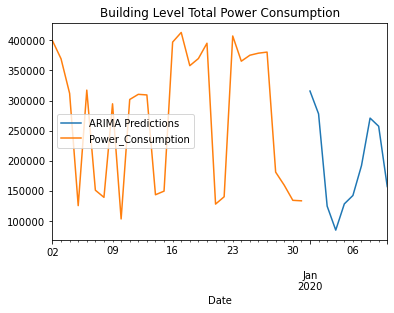

In [94]:
start=len(train)
end=len(train)+len(test)-1
pred=model4.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Building Level Total Power Consumption')
test['Power_Consumption'].plot(legend=True)

In [95]:
final_df

,light_total,ac_total,plug_total,Power_Consumption
Date,,,,
2018-07-01,95364.97,87832.78,46088.27,229286.02
2018-07-02,161360.63,321692.58,61643.42,544696.63
2018-07-03,170308.54,257869.71,56010.85,484189.10
2018-07-04,163224.94,248564.43,59677.12,471466.49
2018-07-05,152569.19,273196.04,52058.76,477823.99
...,...,...,...,...
2019-12-27,134084.39,209814.85,36553.20,380452.44
2019-12-28,65090.19,83760.73,32152.02,181002.94
2019-12-29,64581.94,64775.03,29929.21,159286.18


In [102]:
X=final_df
y=['Team']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Team']=le.fit_transform(X['Team'])
y=le.transform(y)

ValueError: y should be a 1d array, got an array of shape (549, 4) instead.

In [99]:
X

,light_total,ac_total,plug_total,Power_Consumption
Date,,,,
2018-07-01,95364.97,87832.78,46088.27,156
2018-07-02,161360.63,321692.58,61643.42,544
2018-07-03,170308.54,257869.71,56010.85,493
2018-07-04,163224.94,248564.43,59677.12,470
2018-07-05,152569.19,273196.04,52058.76,479
...,...,...,...,...
2019-12-27,134084.39,209814.85,36553.20,254
2019-12-28,65090.19,83760.73,32152.02,91
2019-12-29,64581.94,64775.03,29929.21,48
